<a href="https://www.kaggle.com/code/rasikasrimal/heart-disease-prediction-ml-models?scriptVersionId=258155765" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import os

import pandas as pd
import pickle

In [2]:
data = pd.read_csv("/kaggle/input/cleaned-data/heart_disease_cleaned.csv")

In [3]:
data['thal'] = data['thal'].replace({'fixed defect':'fixed_defect', 'reversable defect':'reversable_defect'})
data['cp'] = data['cp'].replace({'typical angina':'typical_angina', 'atypical angina':'atypical_angina'})
data['restecg'] = data['restecg'].replace({'st-t abnormality':'ST-T_wave_abnormality', 'lv hypertrophy':'left_ventricular_hypertrophy'})

In [4]:
data_1 = data[['age','sex','cp','dataset','trestbps','chol','fbs','restecg',
               'thalch','exang','oldpeak','slope','ca','thal']].copy()

In [5]:
data_1['sex'] = (data_1['sex'] == 'Male').astype(int)
data_1['fasting_blood_sugar'] = data_1['fbs'].astype(int)
data_1['exercise_induced_angina'] = data_1['exang'].astype(int)
data_1 = data_1.drop(columns=['fbs','exang'])

In [6]:
data_1.columns = [
    'age', 'sex', 'chest_pain_type','country','resting_blood_pressure',
    'cholesterol','Restecg','max_heart_rate_achieved','st_depression',
    'st_slope_type','num_major_vessels','thalassemia_type',
    'fasting_blood_sugar','exercise_induced_angina'
]

In [7]:
model_path = "/kaggle/input/heart-disease-prediction-random-forest/scikitlearn/default/1/random_forest_model.pkl"
with open(model_path, "rb") as f:
    loaded_model = pickle.load(f)

In [8]:
X = data_1.copy()

In [9]:
data_1['predicted_target'] = loaded_model.predict(X)
data_1['Heart_Disease'] = data_1['predicted_target'].map({0:'No', 1:'Yes'})

In [10]:
data_1.head(10)

,age,sex,chest_pain_type,country,resting_blood_pressure,cholesterol,Restecg,max_heart_rate_achieved,st_depression,st_slope_type,num_major_vessels,thalassemia_type,fasting_blood_sugar,exercise_induced_angina,predicted_target,Heart_Disease
0,63,1,typical_angina,Cleveland,145.0,233.0,left_ventricular_hypertrophy,150.0,2.3,downsloping,0.0,fixed_defect,1,0,0,No
1,67,1,asymptomatic,Cleveland,160.0,286.0,left_ventricular_hypertrophy,108.0,1.5,flat,3.0,normal,0,1,1,Yes
2,67,1,asymptomatic,Cleveland,120.0,229.0,left_ventricular_hypertrophy,129.0,2.6,flat,2.0,reversable_defect,0,1,1,Yes
3,37,1,non-anginal,Cleveland,130.0,250.0,normal,187.0,3.5,downsloping,0.0,normal,0,0,0,No
4,41,0,atypical_angina,Cleveland,130.0,204.0,left_ventricular_hypertrophy,172.0,1.4,upsloping,0.0,normal,0,0,0,No
5,56,1,atypical_angina,Cleveland,120.0,236.0,normal,178.0,0.8,upsloping,0.0,normal,0,0,0,No
6,62,0,asymptomatic,Cleveland,140.0,268.0,left_ventricular_hypertrophy,160.0,3.6,downsloping,2.0,normal,0,0,1,Yes
7,57,0,asymptomatic,Cleveland,120.0,354.0,normal,163.0,0.6,upsloping,0.0,normal,0,1,0,No
8,63,1,asymptomatic,Cleveland,130.0,254.0,left_ventricular_hypertrophy,147.0,1.4,flat,1.0,reversable_defect,0,0,1,Yes
9,53,1,asymptomatic,Cleveland,140.0,203.0,left_ventricular_hypertrophy,155.0,3.1,downsloping,0.0,reversable_defect,1,1,1,Yes


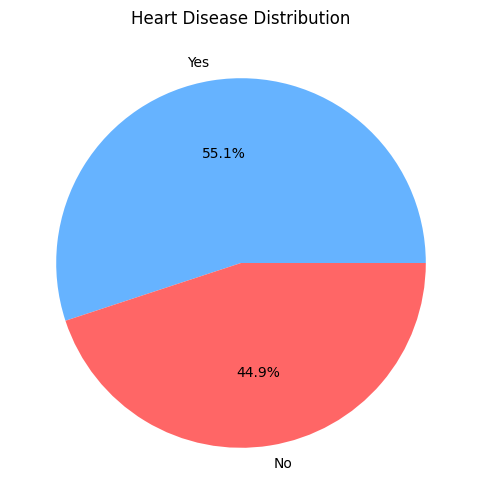

In [11]:
import matplotlib.pyplot as plt

counts = data_1['Heart_Disease'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=['#66b3ff','#ff6666'])
plt.title("Heart Disease Distribution")
plt.show()